In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')

In [3]:
!head -5 titanic_dropna.csv

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S


In [4]:
names = ["PassengerId","Survived","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"]
data = pd.read_csv('titanic_dropna.csv', sep=',', names=names, index_col=0,skiprows=1)

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [6]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 1 to 891
Data columns (total 11 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Name        712 non-null object
Sex         712 non-null object
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Ticket      712 non-null object
Fare        712 non-null float64
Cabin       183 non-null object
Embarked    712 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [8]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [9]:
data['Survived'] = data['Survived'].astype('bool')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 1 to 891
Data columns (total 11 columns):
Survived    712 non-null bool
Pclass      712 non-null int64
Name        712 non-null object
Sex         712 non-null object
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Ticket      712 non-null object
Fare        712 non-null float64
Cabin       183 non-null object
Embarked    712 non-null object
dtypes: bool(1), float64(2), int64(3), object(5)
memory usage: 61.9+ KB


In [11]:
data[data.Pclass == 1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 2 to 890
Data columns (total 11 columns):
Survived    184 non-null bool
Pclass      184 non-null int64
Name        184 non-null object
Sex         184 non-null object
Age         184 non-null float64
SibSp       184 non-null int64
Parch       184 non-null int64
Ticket      184 non-null object
Fare        184 non-null float64
Cabin       158 non-null object
Embarked    184 non-null object
dtypes: bool(1), float64(2), int64(3), object(5)
memory usage: 16.0+ KB


## What do you notice about the data? Any issues?

* Only First Class Passengers have a cabin in data
* Huge variety in fare prices

### What is the overall survival rate?

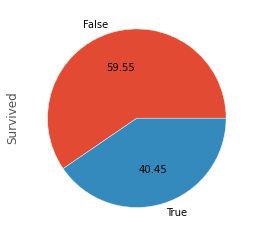

In [12]:
data['Survived'].value_counts().plot(kind="pie",autopct='%.2f',figsize=(4, 4));

### What role does gender play in surviving?

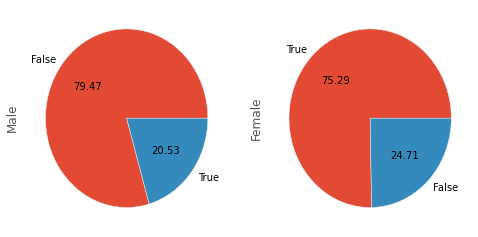

In [13]:
plt.subplot(1,2,1)
data[data.Sex == "male"]["Survived"].value_counts().plot(kind="pie",autopct='%.2f',figsize=(8, 4),label="Male")
plt.subplot(1,2,2)
data[data.Sex == "female"]["Survived"].value_counts().plot(kind="pie",autopct='%.2f',figsize=(8, 4),label="Female");

The female survival percentage is almost reverse of the male percentage.

### What role does class play in surviving?

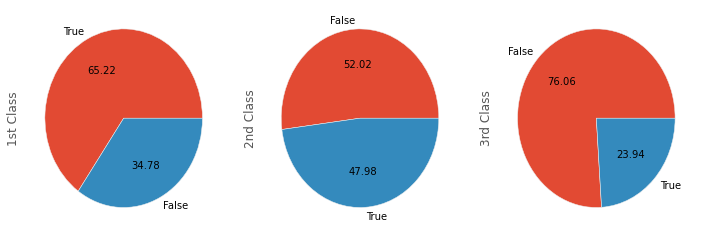

In [14]:
plt.subplot(1,3,1)
data[data.Pclass == 1]["Survived"].value_counts().plot(kind="pie",autopct='%.2f',figsize=(12, 4),label="1st Class")
plt.subplot(1,3,2)
data[data.Pclass == 2]["Survived"].value_counts().plot(kind="pie",autopct='%.2f',figsize=(12, 4),label="2nd Class")
plt.subplot(1,3,3)
data[data.Pclass == 3]["Survived"].value_counts().plot(kind="pie",autopct='%.2f',figsize=(12, 4),label="3rd Class");

### What role does age play in surviving?

In [19]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
data['age_group'] = pd.cut(data.Age, range(0, 81, 10), right=False, labels=labels)
data[['Age', 'age_group']].drop_duplicates()[:10]

,Age,age_group
PassengerId,,
1,22,20-29
2,38,30-39
3,26,20-29
4,35,30-39
7,54,50-59
8,2,0-9
9,27,20-29
10,14,10-19
11,4,0-9


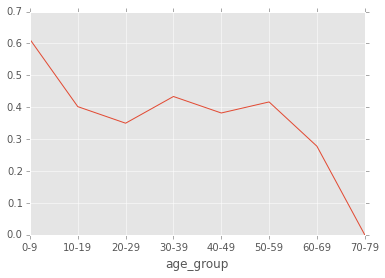

In [23]:
data.groupby('age_group')['Survived'].mean().plot();

### Given the above, do you have any guesses on what predicts survival?

Women and Children in 1st class would have the best chance of survival

### Do you have any ideas for new features we could create from the data that would help us predict if someone will survive?

Exploring the meaning of some of the other columns could allow for new predictions.